# CMS GIWAXS plotting notebook

## Imports

In [1]:
# Imports:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import xarray as xr
from tqdm.auto import tqdm  # progress bar loader!

# Define colormap clim dict:
clims = {'low': (0.8, 4e1),
         'med': (4, 2e2),
         'high': (3e1, 1e3)}

cmap = plt.cm.turbo
cmap.set_bad('black')

## Define & check paths

In [25]:
# I like pathlib for its readability & checkability, it's also necessary for the loadSeries function later on
# Replace the paths with the ones relevant to your data, you can use the ".exists()" method to make sure you defined a path correctly
userPath = pathlib.Path('/nsls2/users/alevin')  # Your users path is great for small items that are personal to you (100 GB limit)
propPath = pathlib.Path('/nsls2/data/cms/proposals/2023-2/pass-311415')  # The proposals path is a good place to store large data (>1 TB space?)
dataPath = propPath.joinpath('KWhite5')
maskponiPath = userPath.joinpath('giwaxs_suite/beamline_data/maskponi')
savePath = propPath.joinpath('AL_processed_data')

qparasPath = savePath.joinpath('qpara_zarrs')
qperpsPath = savePath.joinpath('qperp_zarrs')
seriesPath = savePath.joinpath('series_zarrs')

In [26]:
# List the files inside a folder
sorted([f.name for f in seriesPath.iterdir()])  # a simple way to list just the filenames and not the whole path

['caked_1117471_pm6_0to90s_qpara_007.zarr',
 'caked_1117893_pybtz_0to10s_qpara_011.zarr',
 'caked_1117894_pybtz_10to90s_qpara_011.zarr',
 'caked_1117895_pybtz_90to180s_qpara_011.zarr',
 'caked_1118200_pybtz_0to10s_qpara_013.zarr',
 'caked_1118201_pybtz_10to90s_qpara_013.zarr',
 'caked_1118202_pybtz_90to180s_qpara_013.zarr',
 'caked_1118329_pybtz_0to10s_qpara_014.zarr',
 'caked_1118330_pybtz_10to90s_qpara_014.zarr',
 'caked_1118331_pybtz_90to180s_qpara_014.zarr',
 'raw_1117471_pm6_0to90s_qpara_007.zarr',
 'raw_1117893_pybtz_0to10s_qpara_011.zarr',
 'raw_1117894_pybtz_10to90s_qpara_011.zarr',
 'raw_1117895_pybtz_90to180s_qpara_011.zarr',
 'raw_1118200_pybtz_0to10s_qpara_013.zarr',
 'raw_1118201_pybtz_10to90s_qpara_013.zarr',
 'raw_1118202_pybtz_90to180s_qpara_013.zarr',
 'raw_1118329_pybtz_0to10s_qpara_014.zarr',
 'raw_1118330_pybtz_10to90s_qpara_014.zarr',
 'raw_1118331_pybtz_90to180s_qpara_014.zarr',
 'recip_1117471_pm6_0to90s_qpara_007.zarr',
 'recip_1117893_pybtz_0to10s_qpara_011.zar

## Time-resolved GIWAXS Plotting

In [27]:
# Load a zarr dataset:
filename = 'caked_1117471_pm6_0to90s_qpara_007.zarr'
DA = xr.open_zarr(savePath.joinpath('series_zarrs', filename)).DA
DA

<xarray.DataArray 'DA' (time: 900, chi: 180, qr: 1000)>
dask.array<open_dataset-DA, shape=(900, 180, 1000), dtype=float32, chunksize=(113, 23, 250), chunktype=numpy.ndarray>
Coordinates:
  * chi      (chi) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * qr       (qr) float64 0.1695 0.173 0.1766 0.1801 ... 3.714 3.718 3.721 3.725
  * time     (time) float64 0.1 0.2 0.3 0.4 0.5 0.6 ... 89.6 89.7 89.8 89.9 90.0
Attributes: (12/16)
    blade_speed:           30
    concentration:         18
    detector:              maxs.tiff
    exposure_time:         0.10s
    gap_height:            200
    incident_angle:        th0.120
    ...                    ...
    scan_id:               1117471
    solution_temperature:  80
    solvent:               cb
    stage_temperature:     75
    time_start:            419.0s
    x_position_offset:     x-0.999

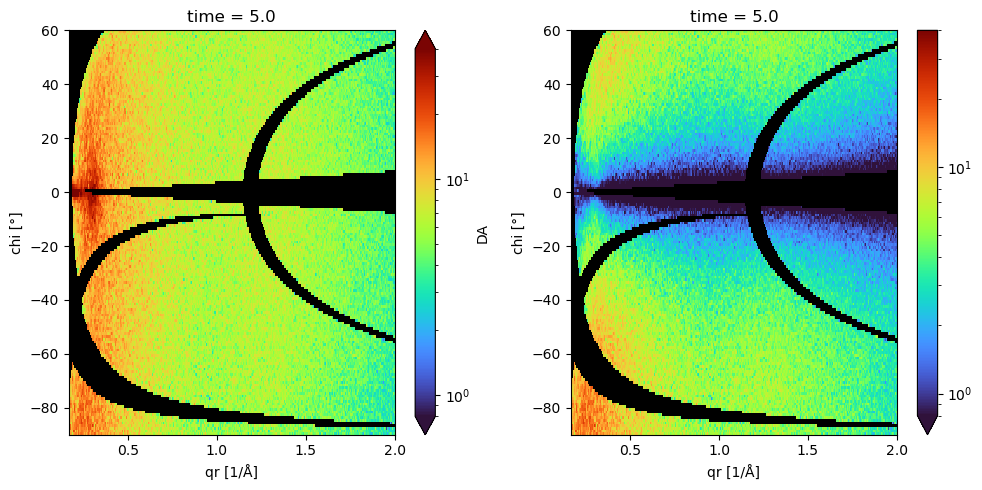

In [33]:
# How one could apply a sin chi correct, the xarray way
sin_chi_DA = np.sin(np.radians(np.abs(DA.chi)))
# sin_chi_DA

corr_DA = DA * sin_chi_DA
# corr_DA

clim = clims['low']
fig, axs = plt.subplots(1,2)
time=5
DA.sel(time=time, method='nearest').sel(chi=slice(-90,60), qr=slice(0,2)).plot.imshow(ax=axs[0], cmap=cmap, norm=LogNorm(clim[0], clim[1]))
corr_DA.sel(time=time, method='nearest').sel(chi=slice(-90,60), qr=slice(0,2)).plot.imshow(ax=axs[1], cmap=cmap, norm=LogNorm(clim[0], clim[1]))
fig.set(tight_layout=True, size_inches=(10,5))
plt.show()

In [ ]:
bin_edges = range(-20, 20, 10)
binned_DA = DA.groupby_bins('chi', bin_edges).sum()
binned_DA

<xarray.DataArray 'DA' (time: 45, chi_bins: 3, qr: 1000)>
dask.array<transpose, shape=(45, 3, 1000), dtype=float32, chunksize=(12, 1, 500), chunktype=numpy.ndarray>
Coordinates:
  * qr        (qr) float64 0.1695 0.173 0.1766 0.1801 ... 3.718 3.721 3.725
  * time      (time) float64 92.0 94.0 96.0 98.0 ... 174.0 176.0 178.0 180.0
  * chi_bins  (chi_bins) object (-20, -10] (-10, 0] (0, 10]
Attributes: (12/15)
    blade_speed:           40
    concentration:         15
    detector:              maxs.tiff
    exposure_time:         2.00s
    gap_height:            200
    incident_angle:        th0.120
    ...                    ...
    scan_id:               1117895
    solution_temperature:  60
    solvent:               CB
    stage_temperature:     60
    time_start:            1371.0s
    x_position_offset:     x-0.000

[None]

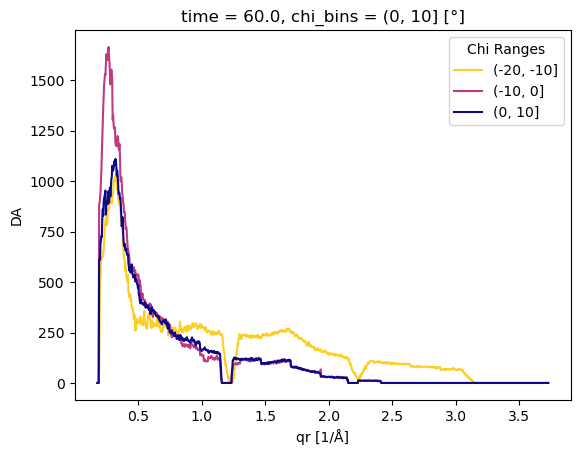

In [168]:
time = 60
colors = plt.cm.plasma_r(np.linspace(0.1, 1, len(binned_DA.chi_bins)))
for i, chi_bin in enumerate(binned_DA.chi_bins):
    binned_DA.sel(time=time, method='nearest').sel(chi_bins=chi_bin).plot.line(color = colors[i], label=chi_bin.values)
    
l = plt.legend()
l.set(title='Chi Ranges')

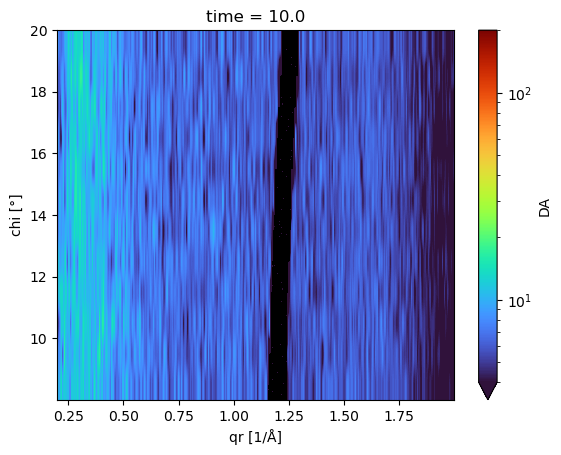

In [280]:
DA.sel(time=90, method='nearest').sel(chi=slice(8, 20), qr=slice(0.2,2)).plot.imshow(cmap=cmap, norm=LogNorm(4, 2e2), interpolation='antialiased')

In [203]:
qr_slice = ((DA.qr >= 0) & (DA.qr <= 2) & ~((DA.qr > 1.15) & (DA.qr < 1.3)))

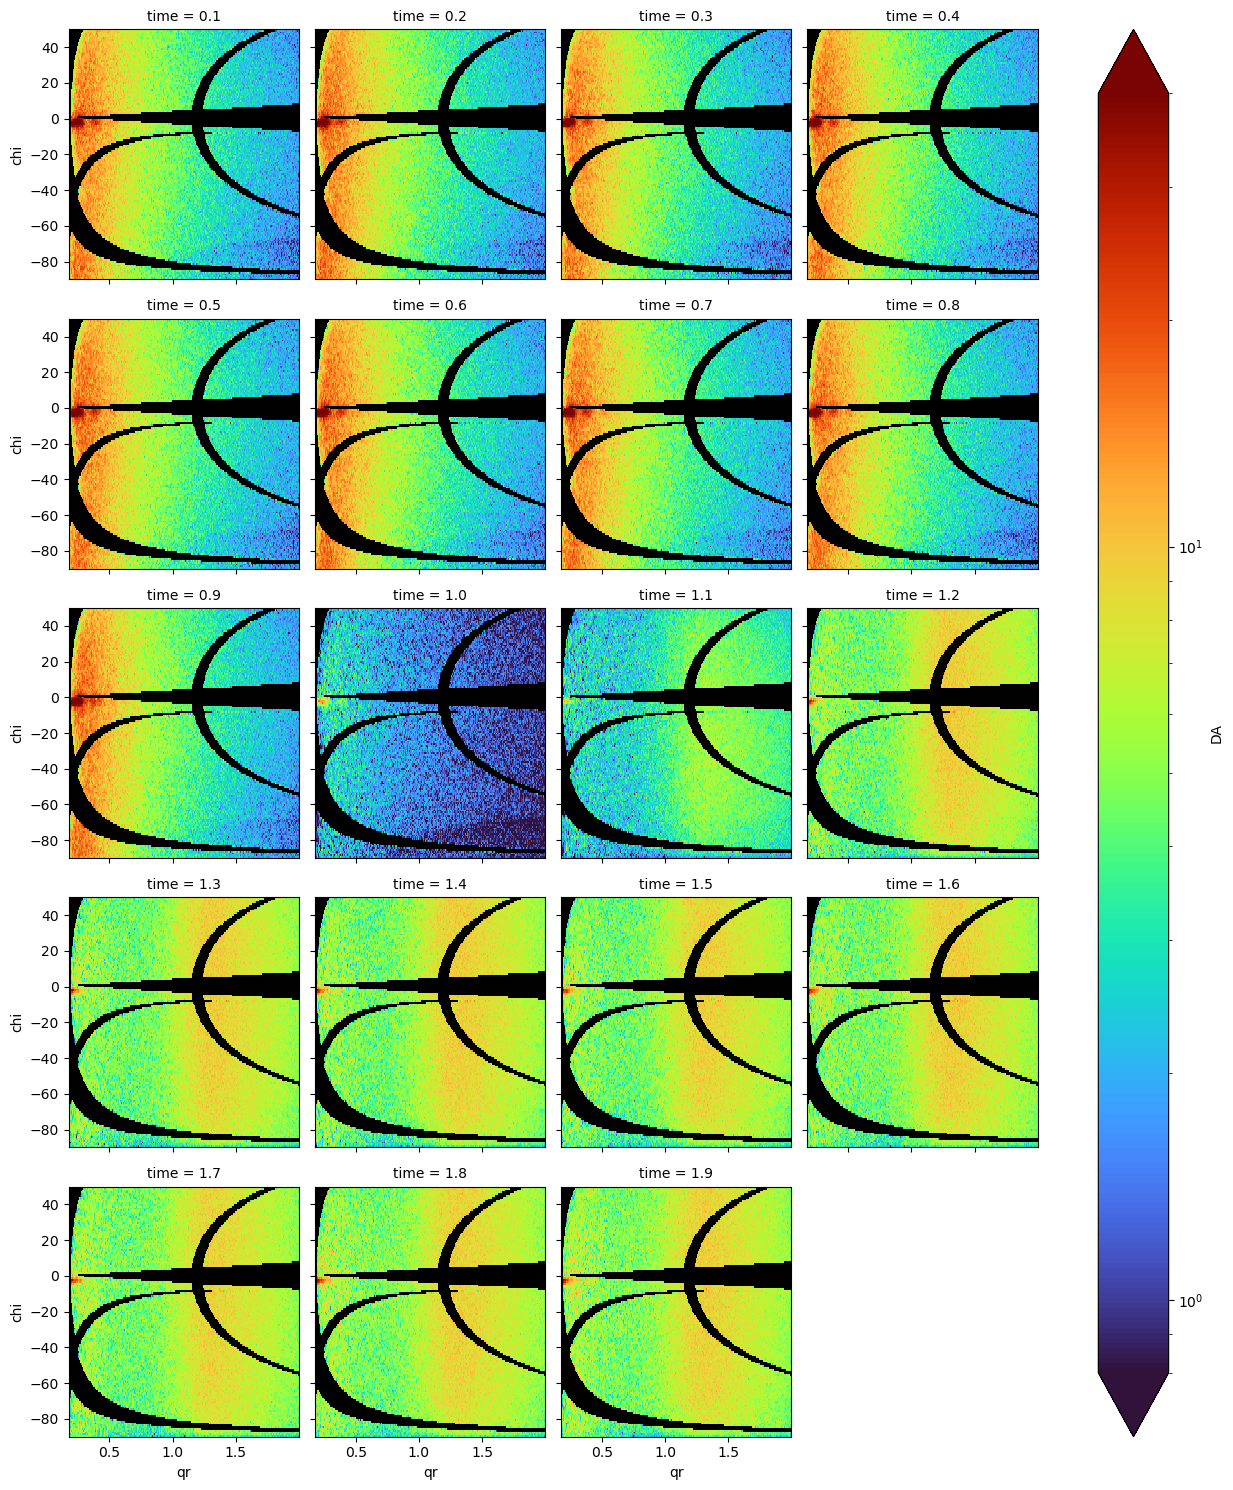

In [303]:
DA.sel(time=np.arange(0.1, 2, 0.1), method='nearest').sel(chi=slice(-90,50), qr=slice(0,2)).plot.imshow(col='time', col_wrap=4, cmap=cmap, norm=LogNorm(0.8, 40.0))

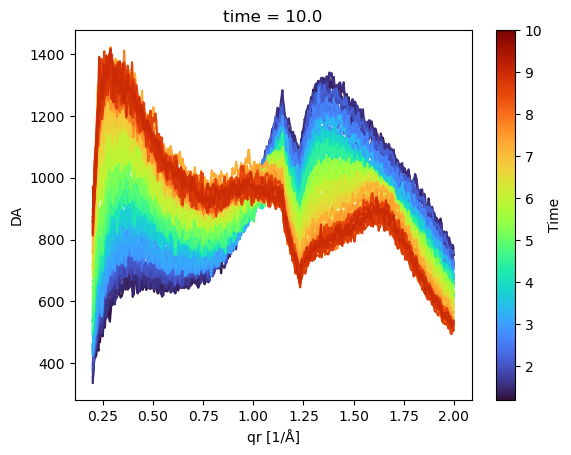

In [345]:
colors = plt.cm.turbo(np.linspace(0,1,len(DA.time)))
fig, ax = plt.subplots()

# nan_DA = DA.where(~((DA.qr >= 1.15) & (DA.qr <= 1.30)), np.nan)
for i, time in enumerate(DA.time.sel(time=slice(1.2, 11))):
    dDA.sel(time=time, method='nearest').sel(chi=slice(-90, 90), qr=slice(0.2,2)).sum('chi').plot(color=colors[i], ax=ax)
    
# # create a ScalarMappable object with the colormap and normalization
# sm = plt.cm.ScalarMappable(cmap=plt.cm.turbo, norm=plt.Normalize(vmin=min(DA.time), vmax=max(DA.time)))
sm = plt.cm.ScalarMappable(cmap=plt.cm.turbo, norm=plt.Normalize(vmin=min(DA.time.sel(time=slice(1.2,20))), vmax=max(DA.time)))

# add the colorbar to the figure
fig.colorbar(sm, ax=ax, orientation='vertical', label='Time')

plt.show()

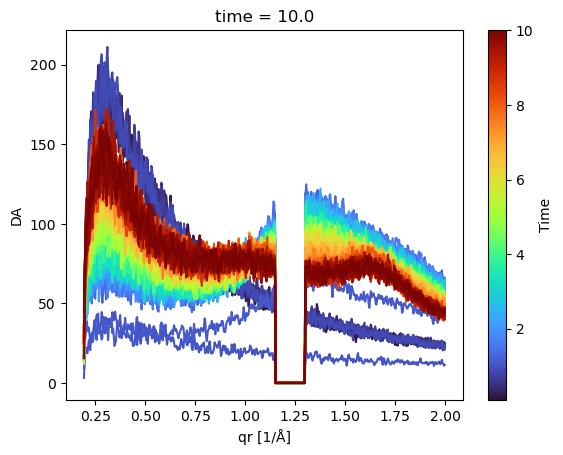

In [281]:
colors = plt.cm.turbo(np.linspace(0,1,len(DA.time)))
fig, ax = plt.subplots()

nan_DA = DA.where(~((DA.qr >= 1.15) & (DA.qr <= 1.30)), np.nan)
for i, time in enumerate(DA.time):
    nan_DA.sel(time=time, method='nearest').sel(chi=slice(8, 20), qr=slice(0.19,2)).sum('chi').plot(color=colors[i], ax=ax)
    
# # create a ScalarMappable object with the colormap and normalization
# sm = plt.cm.ScalarMappable(cmap=plt.cm.turbo, norm=plt.Normalize(vmin=min(DA.time), vmax=max(DA.time)))
sm = plt.cm.ScalarMappable(cmap=plt.cm.turbo, norm=plt.Normalize(vmin=min(DA.time), vmax=max(DA.time)))

# add the colorbar to the figure
fig.colorbar(sm, ax=ax, orientation='vertical', label='Time')

plt.show()

In [284]:
if None:
    print(True)

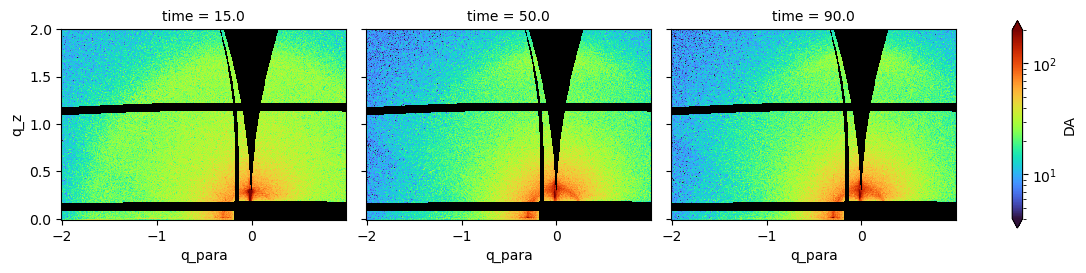

In [79]:
axs = DA.sel(time=[15,50,90], method='nearest').sel(q_z=slice(-0.01, 2), q_para=slice(-2, 1)).plot.imshow(col='time', cmap=cmap, norm=LogNorm(4, 2e2), figsize=(12,3))
for axes in axs.axs[0,:]:
    axes.set(aspect='equal')

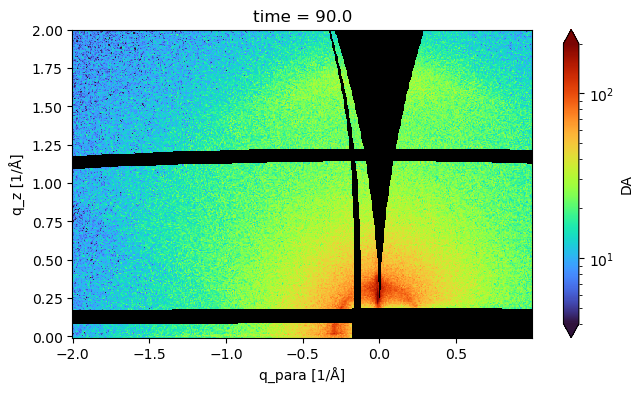

In [56]:
ax = DA.sel(time=90, method='nearest').sel(q_z=slice(-0.01, 2), q_para=slice(-2, 1)).plot.imshow(cmap=cmap, norm=LogNorm(4, 2e2), figsize=(8,4))
ax.axes.set(aspect='equal')
plt.show()

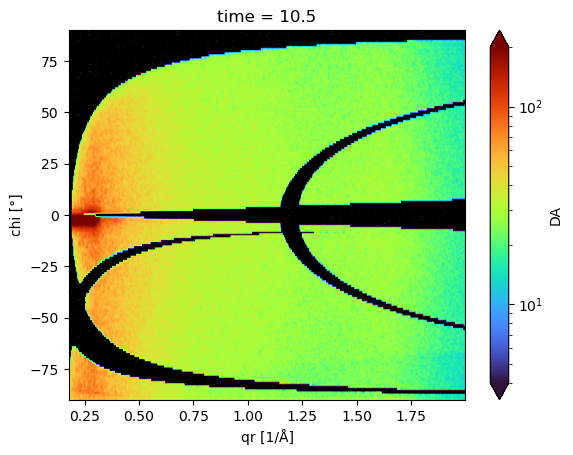

In [169]:
ax = DA.sel(time=10, method='nearest').sel(qr=slice(0, 2), chi=slice(-90, 90)).plot.imshow(cmap=cmap, norm=LogNorm(4, 2e2), interpolation='antialiased')

In [ ]:
### Saves tiff images for all time slices
for da in (...):
    clim = clims[...]
    for time in da.time:
        time = np.round(float(time), 1)
        ax = da.sel(time=time, method='nearest').sel(q_z=slice(-0.01,2), q_para=slice(-2,2)).plot.imshow(cmap=cmap, norm=LogNorm(vlim[0], vlim[1]), figsize=(10,4), interpolation='antialiased')
        ax.axes.set(aspect='equal', xlabel='$q_{para}$ $[Å^{-1}]$', ylabel='$q_{z}$ $[Å^{-1}]$', title=f'PY-BTz BHJ in CB, 1% CN; Time = {time} s')
        # plt.show()
        ax.figure.set_tight_layout(True)
        ax.figure.savefig(savePath.joinpath(f'single_tiffs/{sample}_time-{time}.tiff'), dpi=120)
        plt.close('all')

In [ ]:
### Stack tiff frames

framePaths = sorted(savePath.joinpath('single_tiffs').glob(f'{sample}*'), key=lambda x: float(str(x).split('-')[-1][:-5]))
frame1 = tifftools.read_tiff(framePaths[0])
for framePath in framePaths[1:]:
    frame = tifftools.read_tiff(framePath)
    frame1['ifds'].extend(frame['ifds'])
tifftools.write_tiff(frame1, savePath.joinpath(f'tiff_stacks/recip_{sample}.tiff'), allowExisting=True)

### Select 2D Plot

In [ ]:
cmap = plt.cm.turbo
cmap.set_bad('black')

In [ ]:
ax = recip_DA.sel(time=120, method='nearest').sel(q_z=slice(-0.01,2), q_para=slice(-2,2)).plot.imshow(cmap=cmap, norm=LogNorm(0.8, 4e1), figsize=(10,4), interpolation='antialiased')
ax.axes.set(aspect='equal', xlabel='$q_{para}$ $[Å^{-1}]$', ylabel='$q_{z}$ $[Å^{-1}]$')
plt.show()

In [ ]:
ax = DS.DA.sel(time=100, qr=slice(0,2), chi=slice(-90, 60)).plot.imshow(cmap=cmap, norm=LogNorm(4e1, 1e3), figsize=(8,6), interpolation='antialiased')
ax.axes.set(aspect=1.5e-2)
plt.show()

In [ ]:
caked_pybtz_CB_0to10s_series.sel(time=slice(0,1)).plot(col='time', col_size=4)

In [ ]:
caked_pybtz_CB_90to180s_series.sel(time=100, qr=slice(0,2), chi=slice(5,25)).sum('chi').plot()

In [ ]:
selected_dataarrays = [da for da in caked_DS.data_vars.values() 
                       if da.attrs['exposure_time'] == '5.00s' and 
                       da.attrs['incident_angle'] == 'th0.120']
len(selected_dataarrays)

## Single image GIWAXS Plotting

### 2D plots

#### Caked Images

#### Reciprocal Space Images

### 1D Plots

In [ ]:
# ax = recip_DA.sel(q_perp=slice(-2, 1), q_z=slice(-0.01, 2)).plot.imshow(norm=LogNorm(4e1, 2.5e3), cmap=plt.cm.turbo, interpolation='antialiased')
# ax.axes.set(aspect='equal', xlabel='$q_{perp}$ $[Å^{-1}]$', ylabel='$q_{z}$ $[Å^{-1}]$', title=f'1% CN, 5 s exposure, 0.12° incident angle')
# ax.figure.set(size_inches=(7,3.5), tight_layout=True)
# plt.show()
# # ax.figure.savefig(savePath.joinpath(f'{recip_da.material}_{recip_da.solvent}_qperp_{recip_da.incident_angle}_{recip_da.exposure_time}_{recip_da.scan_id}.png'), dpi=120)
# plt.close('all')